<b>Student names</b>

<font color="orange">Don't forget to write your names here</font>

# <center> HW11 - Programming - Due April 26th, Wed

I'll import everything for you, this time :)

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

## Our $\mu_{MOM}$ and the t-distribution

<font size=1>This question is sponsored by <a href="https://en.wikipedia.org/wiki/William_Sealy_Gosset">Guinness</a> 🍺</font>

Suppose that you have some data $X_1,\cdots,X_n \sim Normal(\mu, \sigma^2)$ where both $\mu$ and $\sigma^2$ are unknown constant we must estimate. (By the way, lots of things in the real world are roughly Normal, so this scenario happens A LOT!). 

<br>
You collect the following data:

$$3.31 \quad 0.3 \quad   2.13 \quad  -0.29 \quad   5.82 \quad   6.64 \quad   4.47 \quad   3.13 \quad   5.38 \quad   5.11$$
<br>

Now, using the MOM procedure as you did in the theory part of this homework, you figure out that 

$$\mu_{MOM} = 3.6 \qquad \sigma^2_{MOM} = 4.89$$

<br>
Okay, next suppose that you must perform the following hypothesis test.

$$H_{0}: \mu = 2 \qquad H_{1}: \mu > 2$$

<br>
To figure this one out, you must first derive the distribution of $\mu_{MOM}$. But since that's just an average, finding out the distribution is a piece of cake:

$$\mu_{MOM} = \frac{X_1 + \cdots + X_n}{n} \sim Normal\left(\mu, \frac{\sigma^2}{n}\right)$$

<br>
Great. All we have to do now is to use this distribution to compute the *p-value*, i.e., $P(\mu_{MOM} > 3.6)$, right? We assume that $H_0$ is true, so that $\mu = 2$...

$$\mu_{MOM} = \frac{X_1 + \cdots + X_n}{n} \sim Normal\left(2, \frac{\sigma^2?}{n}\right)$$

<br>
But wait a moment: what's $\sigma^2$? 

<br>
It's definitely *not* $4.89$, because that's just our *guess*, and not the actual true value. The null hypothesis doesn't assume anything $\sigma^2$ either. 


<br>
You think: *Hm, yeah, but maybe we can just plug in $\sigma^2_{MOM}$? Who's going to know?....*😈

<br>
As it turns out, this is **not** something you can get away with, but the correct procedure is not that hard. William Gosset figure it out for us in the early 1900s. As it turns out, even though the following object is standard Normal

$$\frac{\mu_{MOM} - \mu}{\sqrt{\frac{\sigma^2}{n}}} \sim Normal(0, 1)$$

when we plug in our guess $\sigma_{MOM}$ instead of the unknown $\sigma$, we get something that has the **t-distribution with n-1 degrees of freedom**

$$\frac{\mu_{MOM} - \mu}{\sqrt{\frac{\sigma_{MOM}^2}{n}}} \sim t_{n-1}$$

---

The purpose of this exercise is to get you acquainted with the $t$ distribution. The code below computes two objects.

$$Z_1 = \frac{\mu_{MOM} - \mu}{\sqrt{\frac{\sigma_{MOM}^2}{n}}} \qquad \qquad Z_2 = \frac{\mu_{MOM} - \mu}{\sqrt{\frac{\sigma^2}{n}}}$$

and plots their histogram.


In [2]:
n_sims = 1000
n = 3      # Try small and large values of n!

mu = 3     # We're assuming this is the true, unknown mean    
sigma = 2  # We're assuming this is the true, unknown (but constant!) variance 

zs1 = []
zs2 = []

for i in range(n_sims):
    xs = ss.norm(mu, sigma).rvs(n)
    mu_mom = np.mean(xs)
    sigma_mom = np.std(xs)
    z1 = (mu_mom - mu)/np.sqrt(sigma_mom/n)   # Using sigma_mom
    z2 = (mu_mom - mu)/np.sqrt(sigma/n)       # Using the true sigma
    zs1 = zs1 + [z1]
    zs2 = zs2 + [z2]

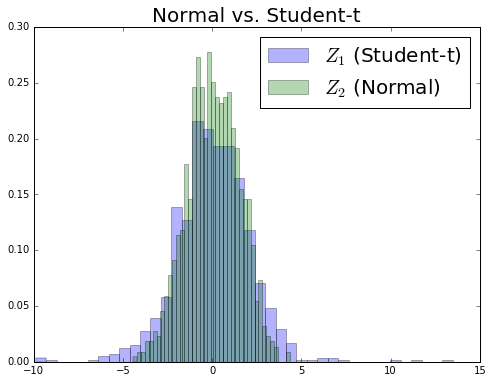

In [3]:
fig, ax = plt.subplots(1, figsize = (8, 6))
ax.hist(zs1, bins = 40, color = "blue", alpha = 0.3, label = "$Z_1$ (Student-t)", normed = True);
ax.hist(zs2, bins = 40, color = "green", alpha = 0.3, label = "$Z_2$ (Normal)", normed = True);
ax.set_title("Normal vs. Student-t", fontsize = 20);
ax.legend(fontsize = 20);

1) Change the code above and investigate how the two distributions differ when $n$ is low (2-5) versus when it is high (say 50-100). In particular, answer the following:

+ Which distribution is more spread out, and which one is more concentrated near the mean?

+ What happens to the distributions as $n$ increases?

<font color="blue">

The $t$ distribution is *always* more spread out than the stanard normal. 

<bR><br>

Intuitively, it captures the extra uncertainty that arises because we have to estimate the variance as well as the mean.

<br><br>
However, as $n$ increases, the tails of the $t_{n-1}$ distribution get thinner and the whole distribution, overall, converges to the standard Normal.

</font>

2) Compute the p-values associated with the test above in two different ways: first using `scipy.stats.t(df = n-1)` and then "incorrectly" using `scipy.stats.norm(0,1)`. Which one p-value is larger? Is that always going to be the case?

<font color="blue">

Assuming that $H_0$ is true, so $\mu = 2$.
<br><br>

$pvalue = P(\mu_{MOM} > 3.6)$<br><br>

$\qquad \ \ = 1 - P(\mu_{MOM} \leq 3.6)$ <br><br>

$\qquad \ \ = P\left(\frac{\mu_{MOM} - 2}{\sqrt{\frac{4.89}{10}}} \leq \frac{3.6 - 2}{\sqrt{\frac{4.89}{10}}} \right)$<br>

<br><br>

Now we're ready to go to Python.
</font>


In [10]:
# Assuming "incorrectly" that 4.89 is the true variance
n = 10
dist = ss.norm(0, 1)
pvalue1 = 1 - dist.cdf((3.6 - 2)/np.sqrt(4.89/10))
print("p-value using the Normal(0,1) distribution: \t" + str(pvalue1))

n = 10
dist = ss.t(df = n-1)
pvalue2 = 1 - dist.cdf((3.6 - 2)/np.sqrt(4.89/10))
print("p-value using the t_[n-1] distribution: \t" + str(pvalue2))

p-value using the Normal(0,1) distribution: 	0.0110672982601
p-value using the t_[n-1] distribution: 	0.0239636360038


<font color="blue">
We see that the p-value that uses the $t$ distribution is larger. This will always be the case, because the $t$ distribution has fatter tails.

<br><br>

The upshot is that we're less likely to reject the null hypothesis, and therefore more conservative.
</font>